In [1]:
setwd("/Users/tony/Dropbox/Projects/UW/")
install.packages("ecoengine", repos=NULL, source='ecoengine/')
library(ecoengine)
setwd("/Users/tony/Dropbox/Projects/UW/SDMpriors/")
library(dplyr)
library(rgbif)
library("IRdisplay")
library(lubridate)


Installing package into ‘/usr/local/lib/R/3.3/site-library’
(as ‘lib’ is unspecified)

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
roc_results = read.csv("results/all_species_ecoregions.csv")
colnames(roc_results)

[1] "X"                    "species"              "score1"              
 [4] "score2"               "score3"               "score4"              
 [7] "lat"                  "lon"                  "geometry"            
[10] "WWF_MHTNAM.ecoregion" "ECO_NAME.ecoregion"

In [3]:
roc_results %>% filter(score4 > 0.50 &
           score4 < 0.80 & 
           WWF_MHTNAM.ecoregion == "Deserts and Xeric Shrublands")%>% select(species, score4)

species,score4
Bufo alvarius,0.6179775
Ctenotus uber,0.5584766
Eremias multiocellata,0.7563353
Formica perpilosa,0.6900826
Phrynosoma douglassii,0.7252525
Spodoptera exempta,0.7130435
Xantusia vigilis,0.6942235


Let's just focus on _Xantusia vigilis_. 

In [4]:
specname = "Xantusia vigilis"
photos = ee_photos(scientific_name = specname)$data
display_html(paste("<h3>",specname,"</h3>", "<img src='", photos[1,13], "'></img>", sep=""))

Search contains 12 photos (downloading 1 of 1 pages 
)
Warning message:
“`rbind_all()` is deprecated. Please use `bind_rows()` instead.”

Xantusia vigilis

In [5]:
source("gbifOccurrence.R")
gbif_occs = gbifOccurence(specname)

In [6]:
colnames(gbif_occs)

[1] "name"                                
  [2] "key"                                 
  [3] "decimalLatitude"                     
  [4] "decimalLongitude"                    
  [5] "issues"                              
  [6] "datasetKey"                          
  [7] "publishingOrgKey"                    
  [8] "publishingCountry"                   
  [9] "protocol"                            
 [10] "lastCrawled"                         
 [11] "lastParsed"                          
 [12] "crawlId"                             
 [13] "basisOfRecord"                       
 [14] "taxonKey"                            
 [15] "kingdomKey"                          
 [16] "phylumKey"                           
 [17] "classKey"                            
 [18] "orderKey"                            
 [19] "familyKey"                           
 [20] "genusKey"                            
 [21] "scientificName"                      
 [22] "kingdom"                             
 [23] "phylum"                              
 [24] "order"                               
 [25] "family"                              
 [26] "genus"                               
 [27] "genericName"                         
 [28] "specificEpithet"                     
 [29] "taxonRank"                           
 [30] "dateIdentified"                      
 [31] "year"                                
 [32] "month"                               
 [33] "day"                                 
 [34] "eventDate"                           
 [35] "modified"                            
 [36] "lastInterpreted"                     
 [37] "references"                          
 [38] "license"                             
 [39] "geodeticDatum"                       
 [40] "class"                               
 [41] "countryCode"                         
 [42] "country"                             
 [43] "rightsHolder"                        
 [44] "identifier"                          
 [45] "verbatimEventDate"                   
 [46] "datasetName"                         
 [47] "collectionCode"                      
 [48] "gbifID"                              
 [49] "verbatimLocality"                    
 [50] "occurrenceID"                        
 [51] "taxonID"                             
 [52] "catalogNumber"                       
 [53] "recordedBy"                          
 [54] "http://unknown.org/occurrenceDetails"
 [55] "institutionCode"                     
 [56] "rights"                              
 [57] "eventTime"                           
 [58] "identificationID"                    
 [59] "infraspecificEpithet"                
 [60] "coordinateUncertaintyInMeters"       
 [61] "individualCount"                     
 [62] "elevation"                           
 [63] "continent"                           
 [64] "stateProvince"                       
 [65] "dynamicProperties"                   
 [66] "associatedTaxa"                      
 [67] "associatedReferences"                
 [68] "municipality"                        
 [69] "county"                              
 [70] "language"                            
 [71] "type"                                
 [72] "taxonRemarks"                        
 [73] "preparations"                        
 [74] "vernacularName"                      
 [75] "verbatimElevation"                   
 [76] "reproductiveCondition"               
 [77] "identifiedBy"                        
 [78] "higherGeography"                     
 [79] "nomenclaturalCode"                   
 [80] "locality"                            
 [81] "previousIdentifications"             
 [82] "ownerInstitutionCode"                
 [83] "occurrenceRemarks"                   
 [84] "accessRights"                        
 [85] "bibliographicCitation"               
 [86] "higherClassification"                
 [87] "informationWithheld"                 
 [88] "lifeStage"                           
 [89] "recordNumber"                      

In [7]:
summarize(gbif_occs, minYear=min(year), maxYear=max(year), medianYear=median(year))

minYear,maxYear,medianYear
1984,2017,2001


Relatively new data, which is fairly good. Let's see how many records pre-1984 we can get from `ecoengine`. 

In [8]:
ee_occs = ee_observations(scientific_name = specname,
                          georeferenced = TRUE,
                          max_date = "1983-01-01 00:00:00", 
                          page = 'all')

Search contains 4214 observations (downloading 5 of 5 pages)


Let's go even further back, to 1950. 

In [10]:
ee_old_occs = ee_observations(scientific_name = specname, 
                              georeferenced = TRUE,
                              max_date = '1950-01-01 00:00:00',
                              page='all')

Search contains 877 observations (downloading 1 of 1 pages)


In [11]:
summarize(ee_occs$data, 
          minYear=min(begin_date),
          maxYear=max(begin_date), 
          medianYear=median(begin_date))

minYear,maxYear,medianYear
1893-11-04,1982-08-19,1965-10-18


In [69]:
before_1940 = ee_occs$data %>% filter(begin_date < ymd('1940-01-01'))
before_1940 %>% count()

n
622


In [13]:
summarize(ee_occs$data, avgLat = sd(latitude), avgLon = sd(longitude))

avgLat,avgLon
0.5600016,1.126925


[1] "longitude"                        "latitude"                        
 [3] "type"                             "url"                             
 [5] "record"                           "observation_type"                
 [7] "scientific_name"                  "country"                         
 [9] "state_province"                   "begin_date"                      
[11] "end_date"                         "source"                          
[13] "remote_resource"                  "locality"                        
[15] "coordinate_uncertainty_in_meters" "recorded_by"                     
[17] "last_modified"                    "decimalLongitude"                
[19] "decimalLatitude"

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=California&zoom=5&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California&sensor=false


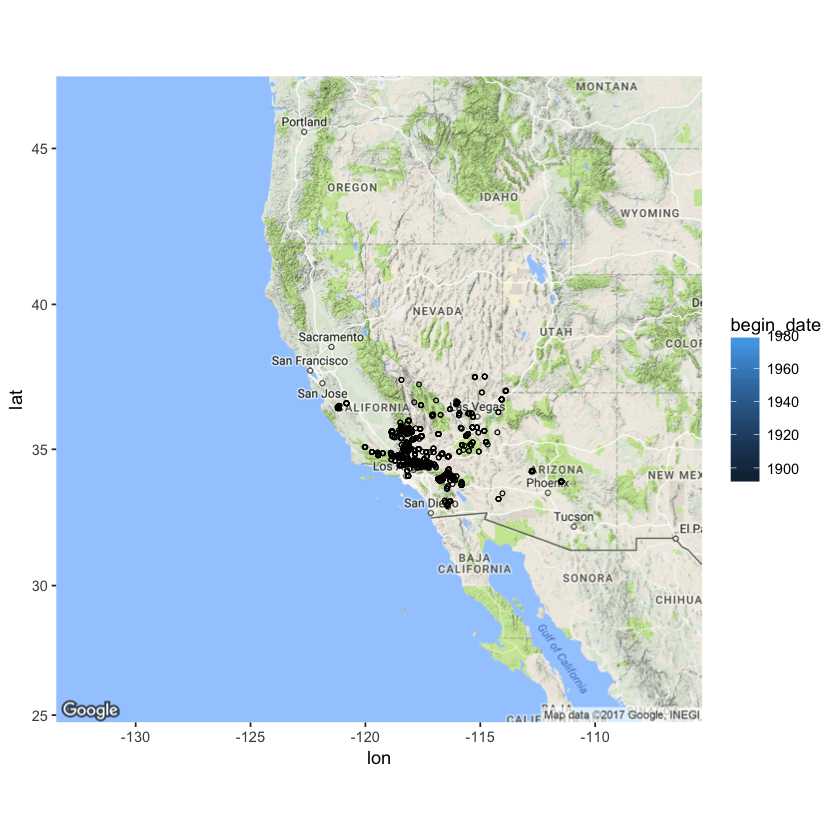

In [78]:
library(ggmap)
colnames(ee_occs$data)

usa = get_map(location = "California", zoom=5)
ggmap(usa) + geom_point(data = ee_occs$data, aes(x=longitude, y=latitude, fill=begin_date), size=1, shape=21) 


---

In [15]:
library(GRaF)

Loading required package: dismo
Loading required package: raster
Loading required package: sp

Attaching package: ‘raster’

The following object is masked from ‘package:dplyr’:

    select


Attaching package: ‘dismo’

The following object is masked from ‘package:ggmap’:

    geocode



In [16]:
## Define physiological Prior
physdata = read.csv("Sundayetal_thermallimits.csv")
speciesIdx = match(specname, physdata$spec)
e.max<-function(x) ifelse(x<physdata$tmax[speciesIdx]-10, 0.9, exp(-(x-physdata$tmax[speciesIdx]+10)/5)) #max  
e.min<-function(x) ifelse(x<physdata$tmin[speciesIdx]   , 0.1, 1- exp(-(x-(physdata$tmax[speciesIdx])/10000) ) ) #min fix
e.prior = function(x) e.max(x[,2]) * e.min(x[,3])


In [17]:
source("climPresAbs.R")

In [27]:
ee_occs$data["decimalLongitude"] = ee_occs$data["longitude"]
ee_occs$data["decimalLatitude"]  = ee_occs$data["latitude"]

In [19]:
pe = climPresAbs(ee_occs$data)

In [21]:
clim_PresAbs = pe
climVars = c("presence", "bio1", "bio5", "bio6")
covs = clim_PresAbs[, climVars]
covs[,2:ncol(covs)] = covs[,2:ncol(covs)]/10 ## (BClim needs to be divided by 10)
# omit rows with NA
covs = na.omit(covs)

## split data into train and test sets.
train_size = floor(0.75*nrow(covs))
trainPres = NULL
testPres = NULL
## make sure that there are 2 classes in the test data
numTries = 0 
while (!(length(unique(testPres)) > 1 && length(unique(trainPres)) > 1) && numTries < 10){
    train_idxs = sample(seq_len(nrow(covs)), size=train_size)
    trainData = covs[train_idxs,]
    trainPres = trainData[,1]
    trainCovs = trainData[,2:ncol(trainData)]
    testData  = covs[-train_idxs,]
    testPres = testData[,1]
    testCovs = testData[,2:ncol(trainData)]
    numTries =+ 1
}

In [24]:
library(rnoaa)
options(noaakey = "qveIJRldDZaXHrASyahqdXLrUypQOcZr")

In [34]:
e = extent(rbind(range(ee_occs$data$decimalLongitude), range(ee_occs$data$decimalLatitude)))

In [39]:
?ncdc_stations

In [73]:
stations = ncdc_stations(extent = c(e@ymin, e@xmin, e@ymax, e@xmax), startdate = '1900-01-01', enddate = '1901-01-01')$data

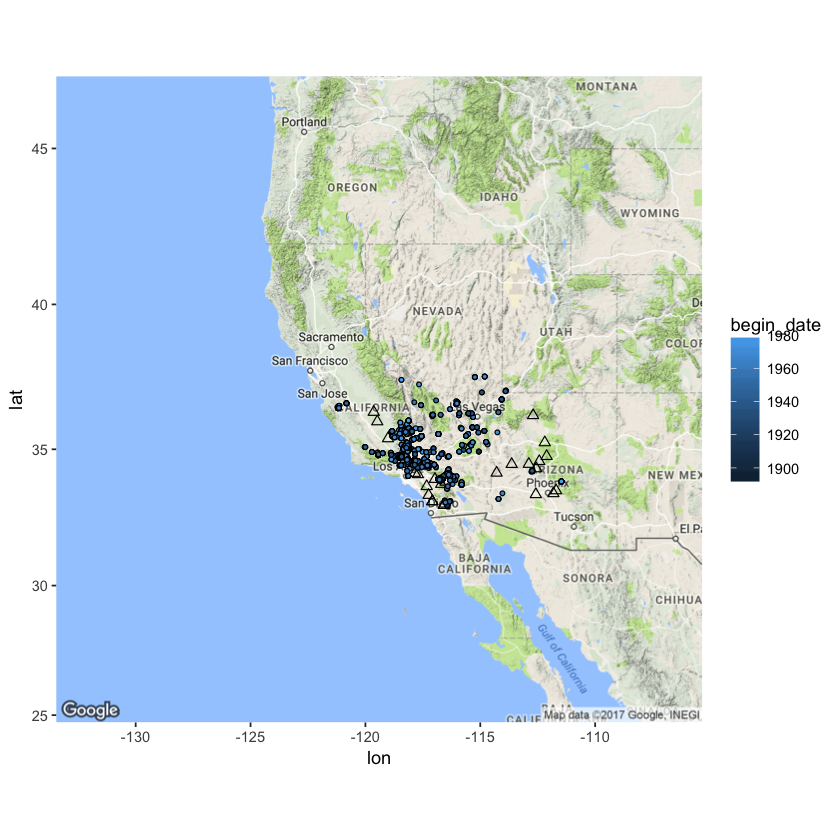

In [83]:
ggmap(usa) + geom_point(data = stations, aes(x=longitude, y=latitude), size=2, shape=2) + 
geom_point(data = ee_occs$data, aes(x=longitude, y=latitude, fill=begin_date), size=1, shape=21) 

In [84]:
?ee_observations